In [1]:
# импортируем нампай, он очень удобен для математических расчетов
import numpy as np

$$
   P(\Delta, T^{[k]}) = e^{-\frac{\Delta}{T^{[k]}}}
$$

In [2]:
# перестановка двух случайных элементов внутри x
def G(x, N):
    x_ = x[:]
    i, j = 0, 0
    while i == j:
        i, j = np.random.randint(0, N), np.random.randint(0, N)
            
    x_[i], x_[j] = x_[j], x_[i]
    return x_

# целевая функция - количество взаимных атак ферзей в конфигурации x
def f(x, N):
    res = 0
        
    for n in range(N):
        k = n - 1
        while k >= 0:
            if x[k] == x[n] + (n - k):
                res += 1

            if x[k] == x[n] - (n - k):
                res += 1
            k -= 1
    
        k = n + 1
        while k < N:
            if x[k] == x[n] + (k - n):
                res += 1

            if x[k] == x[n] - (k - n):
                res += 1
            k += 1
            
    return res

# вероятность изменить приближение на потенциальное, если потенциальное хуже старого
def P(delta, T):
    return np.exp(- delta / T)

In [3]:
# реализуем алгоритм
def SA_queens(N, T_0, x_0, alpha): # настраиваемые параметры лучше поместить в параметры функции метода
    T_k = T_0 # начальная температура - чаще всего 100
    x_k = x_0 # для хранения текущего приближения
    f_k = [f(x_0, N)] # значения f(x) будем хранить в списке, начальные данные уже добавлены 
    while T_k > 1e-09: # критерий остановки, удобно здесь использовать именно температуру (она же снижается)
        x_k_tilde = G(x_k, N) # ищем случайное потенциальное приближение по текущему приближению
        delta = f(x_k_tilde, N) - f_k[-1] # вычисляем разницу
        if delta < 0: # новое приближение оказалось лучше
            x_k = x_k_tilde # сразу оно становится текущим
        else: # а если случайное приближение хуже ?
            if np.random.uniform(0, 1) < P(delta, T_k): # случайная величина равн. распр., чем выше температура, тем P выше
                x_k = x_k_tilde # принимаем неоптимальное решение, мы в этот момент скорее всего молоды
            
        f_k += [f(x_k, N)] # высчитываем текущее значение с текущим приближением
        if not f_k[-1]: # если значение целевой функции достигло минимума - выходим из цикла
            break
        else:
            T_k = alpha * T_k # иначе уменьшаем температуру, она довольно быстро становится низкой, 
                              # поэтому стоит брать alpha > 0.9
    # если решение не найдено, то выведем последнее значение
    print(f'Решение {x_k} найдено за {len(f_k)} итераций' if T_k > 1e-09 else f'Решение не найдено {f_k[-1]}, {len(f_k)}')
    return f_k if T_k > 1e-09 else None

In [8]:
f_k_8 = SA_queens(8, 100, [i for i in range(8)], 0.98) # для N = 8

Решение [1, 4, 6, 3, 0, 7, 5, 2] найдено за 119 итераций


In [11]:
f_k_20 = SA_queens(20, 100, [i for i in range(20)], 0.98) # для N = 20

Решение [11, 0, 15, 17, 5, 13, 8, 14, 2, 7, 3, 1, 16, 18, 10, 12, 19, 9, 4, 6] найдено за 394 итераций


In [13]:
# с помощью этой прекрасной библиотеки мы отображаем результаты работы алгоритма
import matplotlib.pyplot as plt
# import tikzplotlib

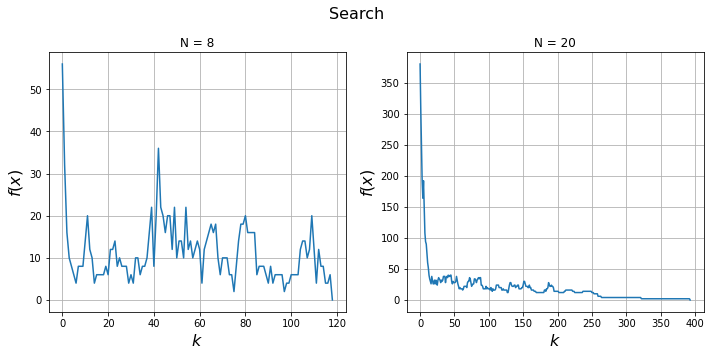

In [14]:
# посмотрим на работу алгоритма
fig, axes = plt.subplots(nrows = 1, ncols = 2, tight_layout = True, figsize=(10, 5))

fig.suptitle('Search', fontsize=16)

axes[0].set(title='N = 8')
axes[1].set(title='N = 20')

plt.rcParams['text.usetex'] = True

axes[0].set_ylabel(r'$f(x)$', fontsize = 16)
axes[0].set_xlabel(r'$k$', fontsize = 16)
axes[1].set_ylabel(r'$f(x)$', fontsize = 16)
axes[1].set_xlabel(r'$k$', fontsize = 16)

axes[0].plot(f_k_8)
axes[1].plot(f_k_20)

axes[0].grid()
axes[1].grid()

plt.rcParams['text.usetex'] = False

plt.show()
# tikzplotlib.save("SA_chess.tex", flavor="context")